<a href="https://colab.research.google.com/github/shriyaD13/AQI/blob/main/ML_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the necessary libraries**

In [ ]:
# Import libraries 
import numpy as np 
import pandas as pd

import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from datetime import datetime

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

### **Loading the data set**

In [ ]:
df = pd.read_csv("/content/city_hour.csv")

### **Selecting the relevant data**

In [ ]:
data = df[254174:293364]
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
254174,Delhi,2016-01-11 03:00:00,279.78,451.54,172.58,42.54,281.86,76.04,3.05,20.53,132.04,8.41,26.31,NaN,377.0,Very Poor
254175,Delhi,2016-01-11 04:00:00,279.30,418.00,238.07,39.73,231.34,76.52,2.85,19.06,132.28,7.96,23.45,NaN,383.0,Very Poor
254176,Delhi,2016-01-11 05:00:00,269.27,400.16,227.88,38.14,225.19,69.32,2.81,17.11,139.09,7.30,20.77,NaN,387.0,Very Poor
254177,Delhi,2016-01-11 06:00:00,265.12,406.34,204.83,44.01,125.94,65.19,3.24,18.09,154.75,7.20,21.81,NaN,392.0,Very Poor
254178,Delhi,2016-01-11 07:00:00,271.47,420.33,209.25,41.62,131.95,67.61,3.85,14.54,196.87,7.54,23.17,NaN,396.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293359,Delhi,2020-06-30 20:00:00,43.19,123.26,6.33,22.28,17.66,29.92,0.92,10.64,44.13,1.63,17.83,0.86,97.0,Satisfactory
293360,Delhi,2020-06-30 21:00:00,45.30,125.22,6.34,22.91,17.96,29.95,1.04,10.59,39.62,1.72,18.06,1.16,99.0,Satisfactory
293361,Delhi,2020-06-30 22:00:00,49.04,129.39,6.29,20.95,16.80,30.01,1.00,10.20,38.95,1.66,16.17,1.18,101.0,Moderate
293362,Delhi,2020-06-30 23:00:00,50.51,128.86,6.19,20.40,16.83,29.40,0.94,10.98,34.53,1.60,16.79,0.85,102.0,Moderate


### **About the dataset**

In [ ]:
data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
254174,Delhi,2016-01-11 03:00:00,279.78,451.54,172.58,42.54,281.86,76.04,3.05,20.53,132.04,8.41,26.31,NaN,377.0,Very Poor
254175,Delhi,2016-01-11 04:00:00,279.30,418.00,238.07,39.73,231.34,76.52,2.85,19.06,132.28,7.96,23.45,NaN,383.0,Very Poor
254176,Delhi,2016-01-11 05:00:00,269.27,400.16,227.88,38.14,225.19,69.32,2.81,17.11,139.09,7.30,20.77,NaN,387.0,Very Poor
254177,Delhi,2016-01-11 06:00:00,265.12,406.34,204.83,44.01,125.94,65.19,3.24,18.09,154.75,7.20,21.81,NaN,392.0,Very Poor
254178,Delhi,2016-01-11 07:00:00,271.47,420.33,209.25,41.62,131.95,67.61,3.85,14.54,196.87,7.54,23.17,NaN,396.0,Very Poor


In [ ]:
data.tail()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
293359,Delhi,2020-06-30 20:00:00,43.19,123.26,6.33,22.28,17.66,29.92,0.92,10.64,44.13,1.63,17.83,0.86,97.0,Satisfactory
293360,Delhi,2020-06-30 21:00:00,45.30,125.22,6.34,22.91,17.96,29.95,1.04,10.59,39.62,1.72,18.06,1.16,99.0,Satisfactory
293361,Delhi,2020-06-30 22:00:00,49.04,129.39,6.29,20.95,16.80,30.01,1.00,10.20,38.95,1.66,16.17,1.18,101.0,Moderate
293362,Delhi,2020-06-30 23:00:00,50.51,128.86,6.19,20.40,16.83,29.40,0.94,10.98,34.53,1.60,16.79,0.85,102.0,Moderate
293363,Delhi,2020-07-01 00:00:00,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0,Moderate


In [ ]:
data.shape

(39190, 16)

In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,38839.000000,37069.000000,38893.000000,38860.000000,39167.000000,38281.000000,38918.000000,36343.000000,37004.000000,39152.000000,39164.000000,24231.000000,38742.000000
mean,116.690683,232.301089,40.021199,50.593297,52.865483,40.660991,1.237150,16.676786,49.398035,3.498067,18.626182,0.962979,250.580197
std,98.476322,142.936583,51.440940,28.193107,44.284075,16.441588,1.094813,10.263896,33.689697,3.125169,19.511488,3.364673,125.647132
min,0.050000,2.990000,0.050000,3.990000,0.000000,0.570000,0.000000,0.020000,0.640000,0.000000,0.000000,0.000000,22.000000
25%,49.340000,123.540000,10.890000,29.667500,24.185000,29.870000,0.720000,10.240000,25.230000,1.460000,5.540000,0.050000,142.000000
50%,84.420000,203.330000,19.440000,44.210000,39.020000,37.100000,1.000000,14.040000,38.925000,2.570000,13.210000,0.220000,241.000000
75%,153.875000,312.870000,45.380000,64.910000,67.660000,47.880000,1.450000,19.880000,65.290000,4.570000,24.620000,0.840000,340.000000
max,938.500000,1000.000000,497.400000,337.820000,363.360000,245.560000,39.900000,187.050000,497.620000,64.870000,162.000000,158.830000,762.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39190 entries, 254174 to 293363
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        39190 non-null  object 
 1   Datetime    39190 non-null  object 
 2   PM2.5       38839 non-null  float64
 3   PM10        37069 non-null  float64
 4   NO          38893 non-null  float64
 5   NO2         38860 non-null  float64
 6   NOx         39167 non-null  float64
 7   NH3         38281 non-null  float64
 8   CO          38918 non-null  float64
 9   SO2         36343 non-null  float64
 10  O3          37004 non-null  float64
 11  Benzene     39152 non-null  float64
 12  Toluene     39164 non-null  float64
 13  Xylene      24231 non-null  float64
 14  AQI         38742 non-null  float64
 15  AQI_Bucket  38742 non-null  object 
dtypes: float64(13), object(3)
memory usage: 4.8+ MB


## **Removing outliers** 

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for coloumn in data.iloc[:,2:15]:
  data = remove_outlier(data,coloumn)

data.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,16132.000000,16132.000000,16132.000000,16132.000000,16132.000000,16132.000000,16132.000000,16132.000000,16132.000000,16132.000000,16132.000000,16132.000000,16132.000000
mean,79.395378,167.999976,17.124781,35.703703,34.895390,35.982191,0.986059,12.849187,44.738357,2.290966,16.475519,0.263991,205.465038
std,53.338252,87.444563,12.033081,13.887607,18.262888,9.217706,0.302884,4.674021,25.417189,1.223816,10.794125,0.318825,98.631614
min,7.430000,8.380000,3.570000,10.220000,0.000000,13.090000,0.150000,0.020000,9.310000,0.000000,0.330000,0.000000,44.000000
25%,40.037500,100.217500,9.320000,25.410000,22.450000,28.990000,0.780000,9.537500,23.587500,1.370000,7.250000,0.010000,121.000000
50%,63.935000,154.540000,13.360000,33.080000,31.110000,34.520000,0.940000,11.675000,37.640000,2.025000,15.270000,0.130000,186.000000
75%,104.652500,219.977500,20.260000,43.970000,43.750000,41.562500,1.160000,15.212500,61.212500,2.990000,23.590000,0.400000,278.000000
max,308.640000,553.180000,86.570000,97.490000,100.290000,64.220000,1.950000,30.090000,124.760000,6.280000,47.470000,1.360000,518.000000


## **Replacing all the missing values**



In [ ]:
#Checking and counting for missing data points for each column
print(data.isnull().sum())

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [ ]:
#Replacing the missing values with the mean
def impute_mean(series):
    return series.fillna(series.mean())

for coloumn in data.iloc[:, 2:15]:
  data[coloumn] = data[coloumn].transform(impute_mean)


In [ ]:
#Checking the data for missing values
print(data.isnull().sum())

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [ ]:
data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
269148,Delhi,2017-09-26 01:00:00,60.56,113.70,22.04,31.38,21.46,36.43,0.67,5.55,17.01,0.39,3.31,0.12,118.0,Moderate
269149,Delhi,2017-09-26 02:00:00,52.87,125.22,26.67,31.17,20.95,33.53,0.72,6.13,43.04,0.26,2.81,0.13,121.0,Moderate
269150,Delhi,2017-09-26 03:00:00,58.47,135.72,23.02,29.63,19.12,32.66,0.80,6.00,18.71,0.30,2.47,0.13,123.0,Moderate
269151,Delhi,2017-09-26 04:00:00,65.67,114.45,20.91,29.16,15.49,30.76,0.84,6.22,18.87,0.23,1.87,0.12,124.0,Moderate
269152,Delhi,2017-09-26 05:00:00,70.77,110.86,25.96,30.36,16.31,28.60,0.97,7.64,18.33,0.20,1.57,0.12,126.0,Moderate


In [ ]:
data.tail()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
293359,Delhi,2020-06-30 20:00:00,43.19,123.26,6.33,22.28,17.66,29.92,0.92,10.64,44.13,1.63,17.83,0.86,97.0,Satisfactory
293360,Delhi,2020-06-30 21:00:00,45.30,125.22,6.34,22.91,17.96,29.95,1.04,10.59,39.62,1.72,18.06,1.16,99.0,Satisfactory
293361,Delhi,2020-06-30 22:00:00,49.04,129.39,6.29,20.95,16.80,30.01,1.00,10.20,38.95,1.66,16.17,1.18,101.0,Moderate
293362,Delhi,2020-06-30 23:00:00,50.51,128.86,6.19,20.40,16.83,29.40,0.94,10.98,34.53,1.60,16.79,0.85,102.0,Moderate
293363,Delhi,2020-07-01 00:00:00,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0,Moderate


## **Visualizing the data**

### Time series

In [ ]:
data['Datetime'] = pd.to_datetime(df['Datetime'])


In [ ]:
def time_series(start, end,s):
    time_series_df = data[['Datetime', 'AQI']][(data['Datetime'] >= start) & (data['Datetime'] <= end)]
    x = time_series_df.Datetime
    y = time_series_df.AQI
    points= x.size
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('AQI Value')
    plt.title(s)
    return plt.show();

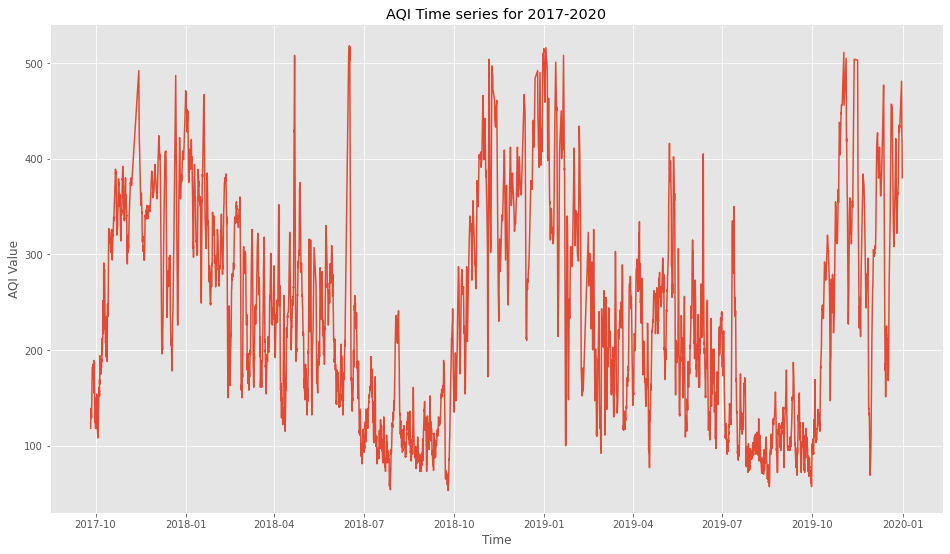

In [ ]:
time_series('2017','2020',"AQI Time series for 2017-2020")


In [ ]:
 df2 = data.rename(columns = {'PM2.5':'PMvalue'})
def time_series2(start, end,s):
    time_series_df = df2[['Datetime', 'PMvalue']][(df2['Datetime'] >= start) & (df2['Datetime'] <= end)]
    time_series_df.head()
    x = time_series_df.Datetime
    y = time_series_df.PMvalue
    points= x.size
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title(s)
    return plt.show();

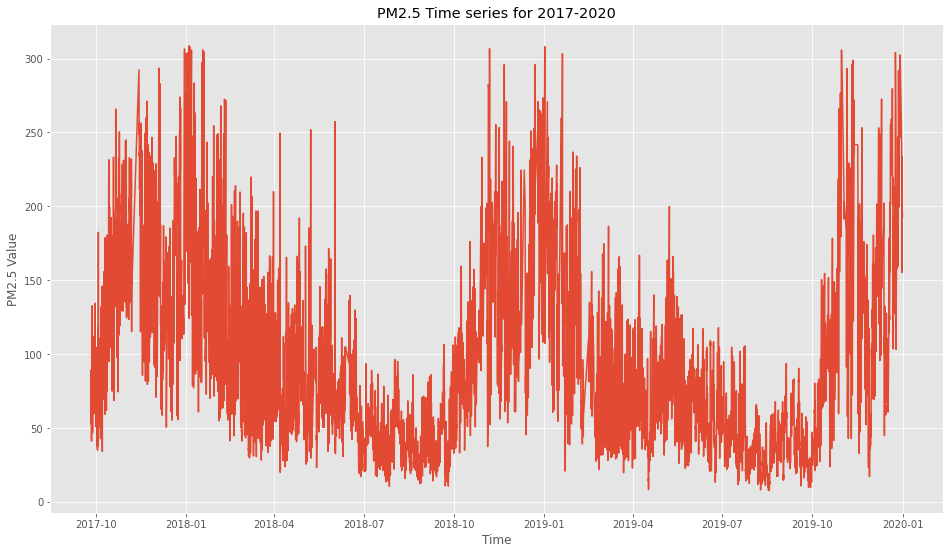

In [ ]:
time_series2('2017','2020',"PM2.5 Time series for 2017-2020")

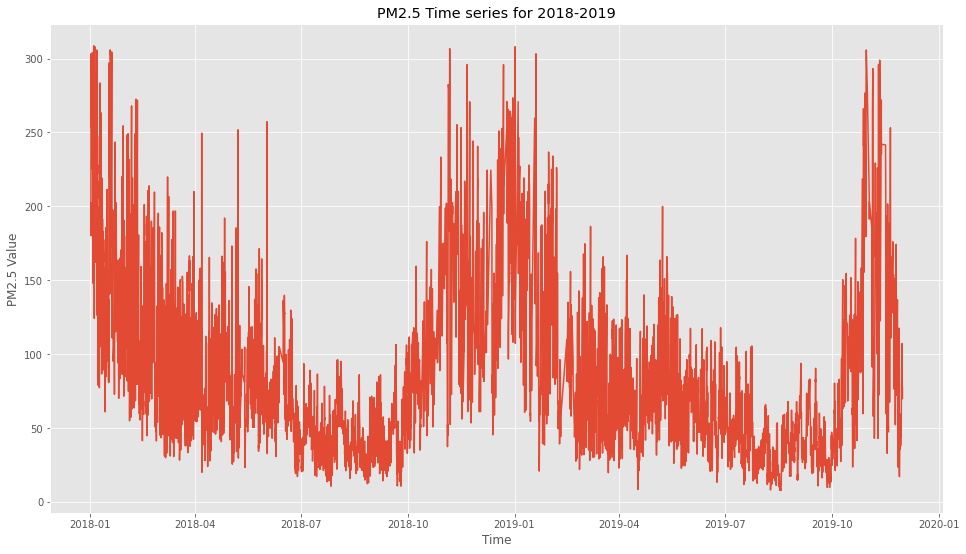

In [ ]:
time_series2('2018','2019-12',"PM2.5 Time series for 2018-2019")

         City            Datetime  PM2.5  ...  Xylene    AQI    AQI_Bucket
269148  Delhi 2017-09-26 01:00:00  60.56  ...    0.12  118.0      Moderate
269149  Delhi 2017-09-26 02:00:00  52.87  ...    0.13  121.0      Moderate
269150  Delhi 2017-09-26 03:00:00  58.47  ...    0.13  123.0      Moderate
269151  Delhi 2017-09-26 04:00:00  65.67  ...    0.12  124.0      Moderate
269152  Delhi 2017-09-26 05:00:00  70.77  ...    0.12  126.0      Moderate
...       ...                 ...    ...  ...     ...    ...           ...
293359  Delhi 2020-06-30 20:00:00  43.19  ...    0.86   97.0  Satisfactory
293360  Delhi 2020-06-30 21:00:00  45.30  ...    1.16   99.0  Satisfactory
293361  Delhi 2020-06-30 22:00:00  49.04  ...    1.18  101.0      Moderate
293362  Delhi 2020-06-30 23:00:00  50.51  ...    0.85  102.0      Moderate
293363  Delhi 2020-07-01 00:00:00  54.01  ...    0.65  101.0      Moderate

[16132 rows x 16 columns]


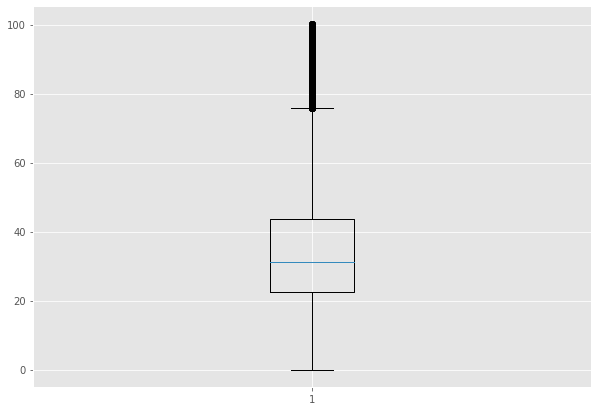

In [ ]:
#Creating dataset 
np.random.seed(10) 
selectData =data["NOx"]
print(data)
fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(selectData) 

# show plot 
plt.show()

In [ ]:
!pip install pandas_visual_analysis

In [ ]:
from pandas_visual_analysis import  VisualAnalysis
VisualAnalysis(data);

In [ ]:
data.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.811095,0.470415,0.617152,0.416522,0.626605,0.525977,0.369691,0.049812,0.572618,-0.004592,0.066366,0.772283
PM10,0.811095,1.000000,0.362524,0.563257,0.415860,0.492810,0.477276,0.376978,0.220106,0.510396,-0.004891,0.028377,0.740800
NO,0.470415,0.362524,1.000000,0.581362,0.715710,0.341458,0.551636,0.162494,-0.341218,0.488911,0.198172,0.149066,0.308654
NO2,0.617152,0.563257,0.581362,1.000000,0.690412,0.472527,0.702457,0.409413,-0.126572,0.628763,0.222192,0.174557,0.560544
NOx,0.416522,0.415860,0.715710,0.690412,1.000000,0.340961,0.623057,0.230394,-0.219393,0.528218,0.211711,0.127766,0.342614
NH3,0.626605,0.492810,0.341458,0.472527,0.340961,1.000000,0.427480,0.196865,0.002059,0.326589,-0.103062,0.008857,0.521175
CO,0.525977,0.477276,0.551636,0.702457,0.623057,0.427480,1.000000,0.291213,-0.161915,0.652692,0.289765,0.205578,0.401658
SO2,0.369691,0.376978,0.162494,0.409413,0.230394,0.196865,0.291213,1.000000,0.172805,0.335153,0.063355,0.058384,0.280890
O3,0.049812,0.220106,-0.341218,-0.126572,-0.219393,0.002059,-0.161915,0.172805,1.000000,-0.148168,-0.244440,-0.165971,0.245089
Benzene,0.572618,0.510396,0.488911,0.628763,0.528218,0.326589,0.652692,0.335153,-0.148168,1.000000,0.521196,0.278530,0.454418


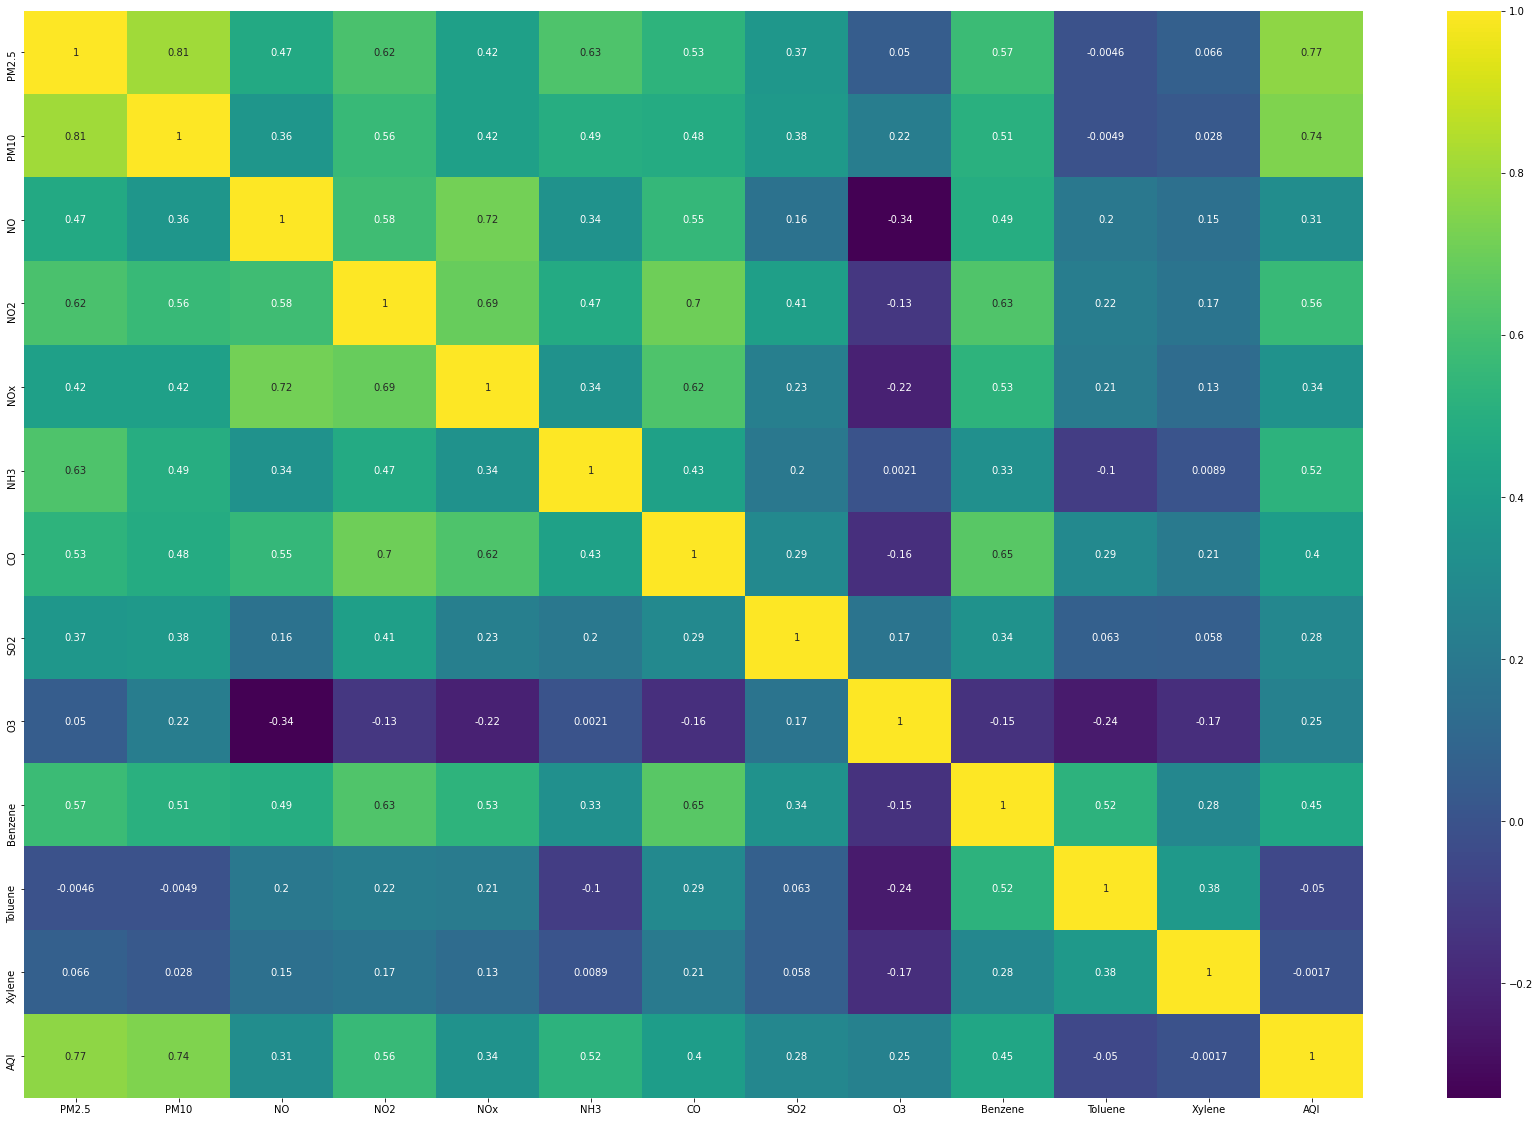

In [ ]:
corrmat = data.corr()
corr_feature = corrmat.index
plt.figure(figsize=(30,20))
g=sns.heatmap(data[corr_feature].corr(),annot=True,cmap='viridis')

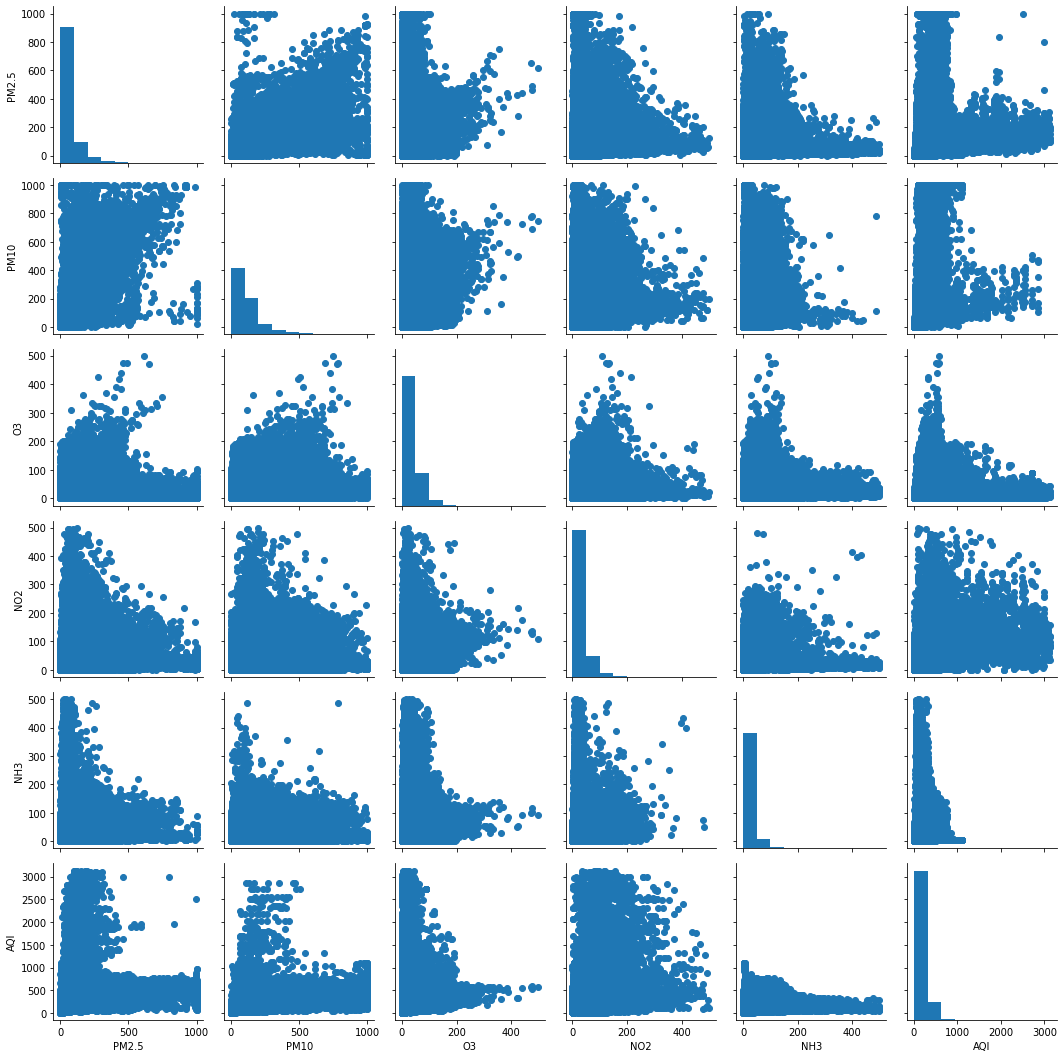

In [ ]:
g = sns.PairGrid(df, vars=["PM2.5", "PM10", "O3", "NO2",'NH3', "AQI"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

## **Prediction**

**1. Train-Test split**

In [ ]:
# Featue selection
feature=data
feature=feature.drop(['City','AQI_Bucket','Datetime','AQI','Xylene','Toluene'],axis=1)
feature.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene
269148,60.56,113.70,22.04,31.38,21.46,36.43,0.67,5.55,17.01,0.39
269149,52.87,125.22,26.67,31.17,20.95,33.53,0.72,6.13,43.04,0.26
269150,58.47,135.72,23.02,29.63,19.12,32.66,0.80,6.00,18.71,0.30
269151,65.67,114.45,20.91,29.16,15.49,30.76,0.84,6.22,18.87,0.23
269152,70.77,110.86,25.96,30.36,16.31,28.60,0.97,7.64,18.33,0.20


In [ ]:
X = feature
y = data['AQI']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [ ]:
print(X_train.shape,y_train.shape)

(11292, 10) (11292,)


In [ ]:
print(X_test.shape,y_test.shape)

(4840, 10) (4840,)


In [ ]:
X_train.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene
284787,46.36,144.53,8.49,22.86,19.50,30.69,1.08,8.74,32.19,1.66
277854,34.86,71.68,7.88,24.12,19.54,23.22,0.73,11.10,26.02,1.82
278690,96.44,206.06,9.74,28.50,24.83,35.60,0.91,14.82,97.70,3.12
292569,39.57,178.60,4.70,16.34,12.51,27.95,0.73,12.66,45.20,1.26
288484,145.37,232.37,10.81,55.16,41.32,52.17,1.14,9.16,63.17,3.83


**1. Linear Regression**

In [ ]:
lr = LinearRegression()
# X_train_new = X_train.drop(['NOx'],axis=1)
lr.fit(X_train,y_train)
# X_test_new = X_test.drop(['NOx'],axis=1)
lr_score = lr.score(X_test,y_test)
lr_score


0.6787831693030539

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([ 91.58751255, 271.02604782, 168.15870747, ..., 234.42365735,
       122.51667763, 177.98816598])

In [ ]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.68


In [ ]:
print('R squared value: %.2f'%r2_score(y_test, y_pred))

R squared value: 0.68


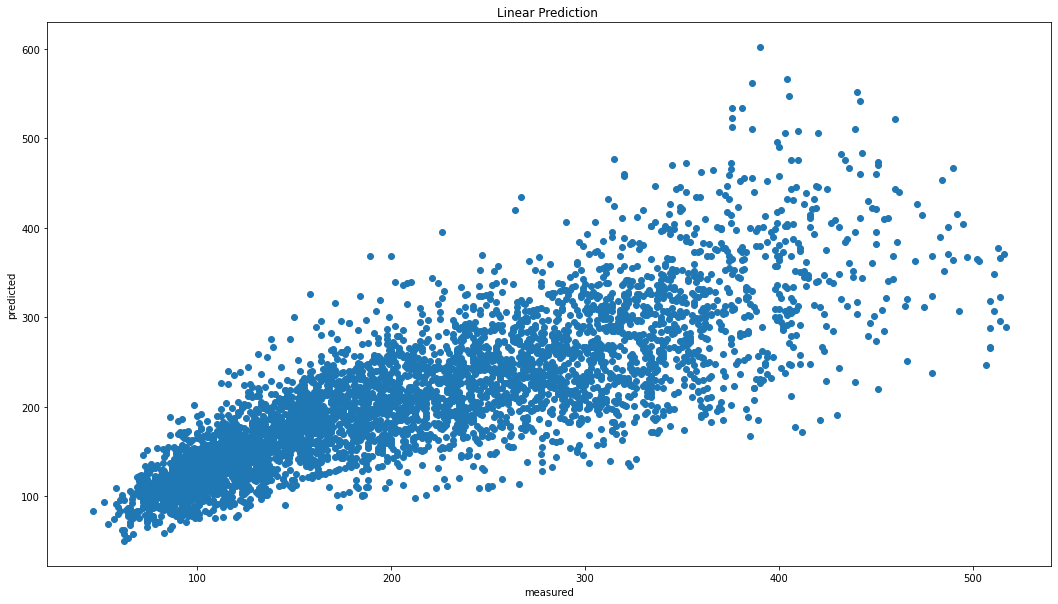

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(y_test,y_pred)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("Linear Prediction ")
plt.show()

In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [  0.8800271    0.2487869   -0.29448537   1.76767237  -0.08490381
   0.65008734 -29.06338484  -2.21427993   0.75863485   3.53306023]


### **Neural Network Regression**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mlp = MLPRegressor()

In [ ]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.7443048488743036

In [ ]:
nnr_pred = mlp.predict(X_test)

from math import sqrt

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 49.96
Mean absolute error: 36.77
R-squared: 0.74


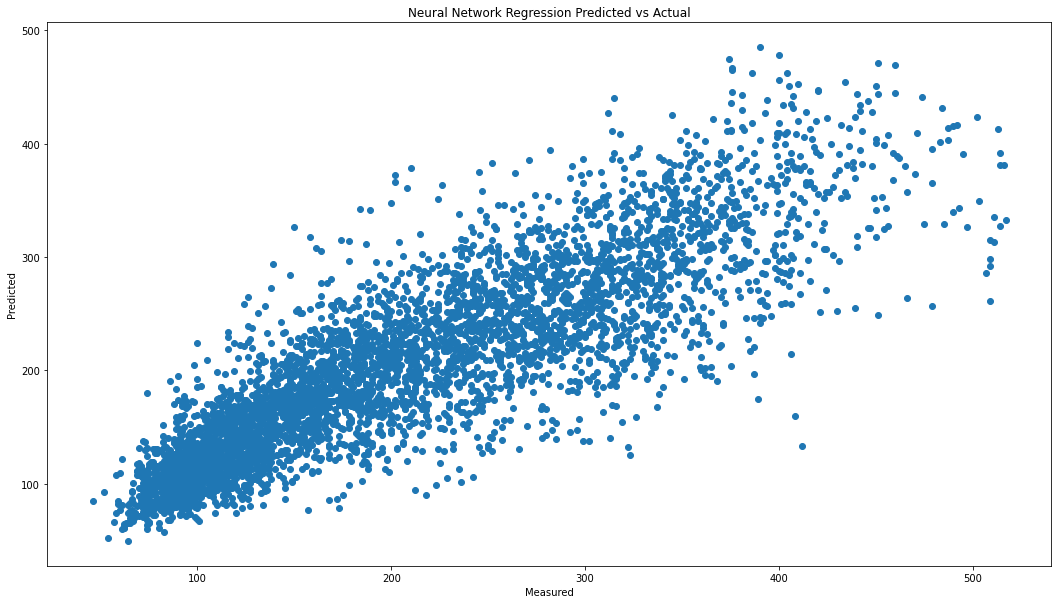

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

### **Lasso**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.6750612184825929

In [ ]:
lasso_pred = lasso.predict(X_test)
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

Root mean squared error: 56.31


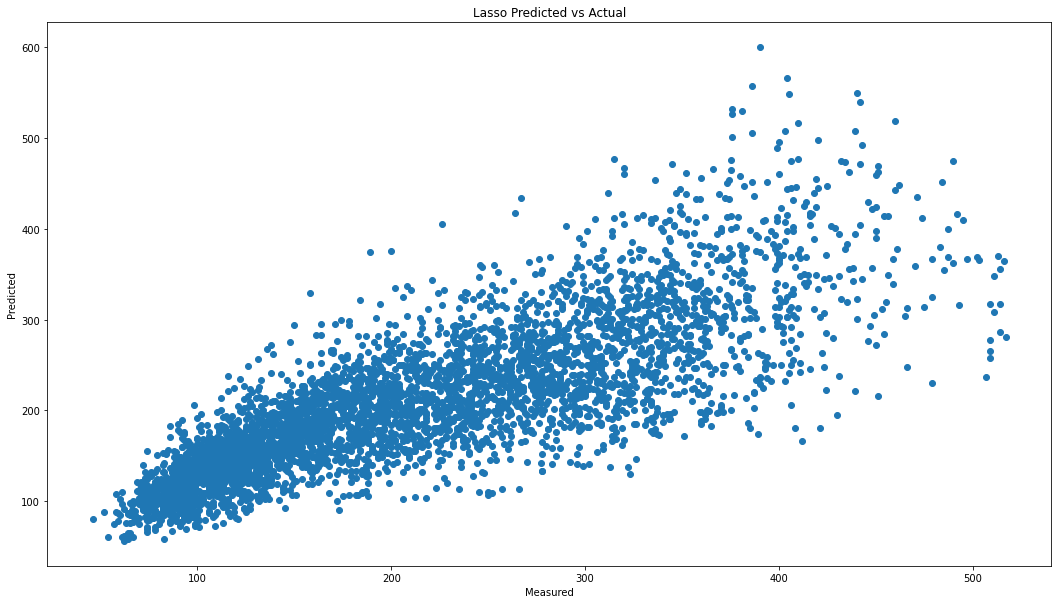

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

### **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:

elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.6752479401255527

In [ ]:
elasticnet_pred = elasticnet.predict(X_test)
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))

Root mean squared error: 56.30


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)
regr_rf.fit(X_train,y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [ ]:
# decision_forest_score = regr_rf.score(X_train, y_train)
# decision_forest_score

0.9738133288645554

In [ ]:
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score


0.7992009843585217

In [ ]:

regr_rf_pred = regr_rf.predict(X_test)


print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))

Root mean squared error: 44.27


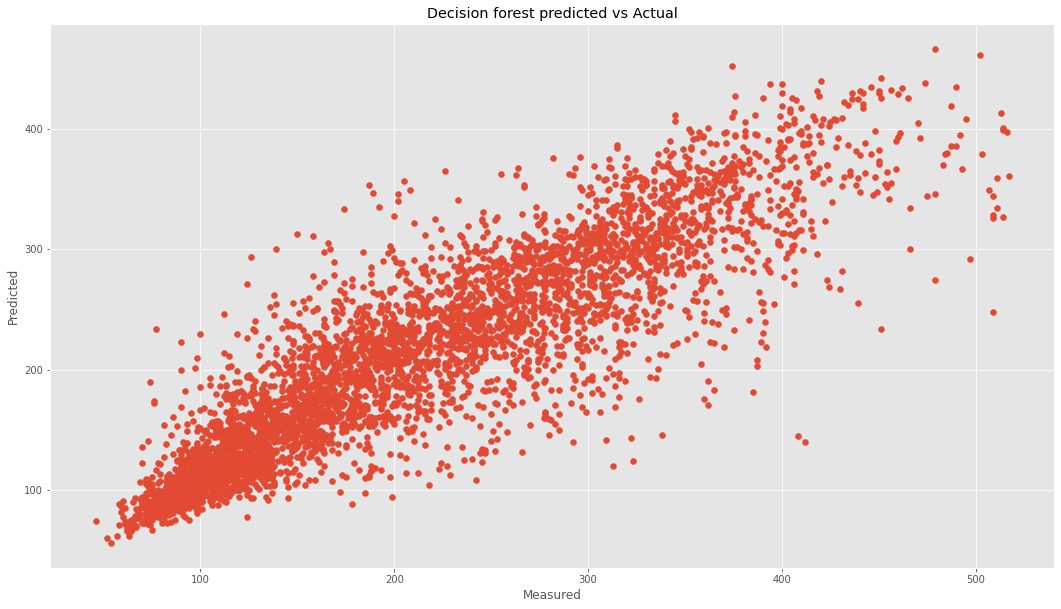

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(y_test,regr_rf_pred )
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision forest predicted vs Actual')
plt.show()

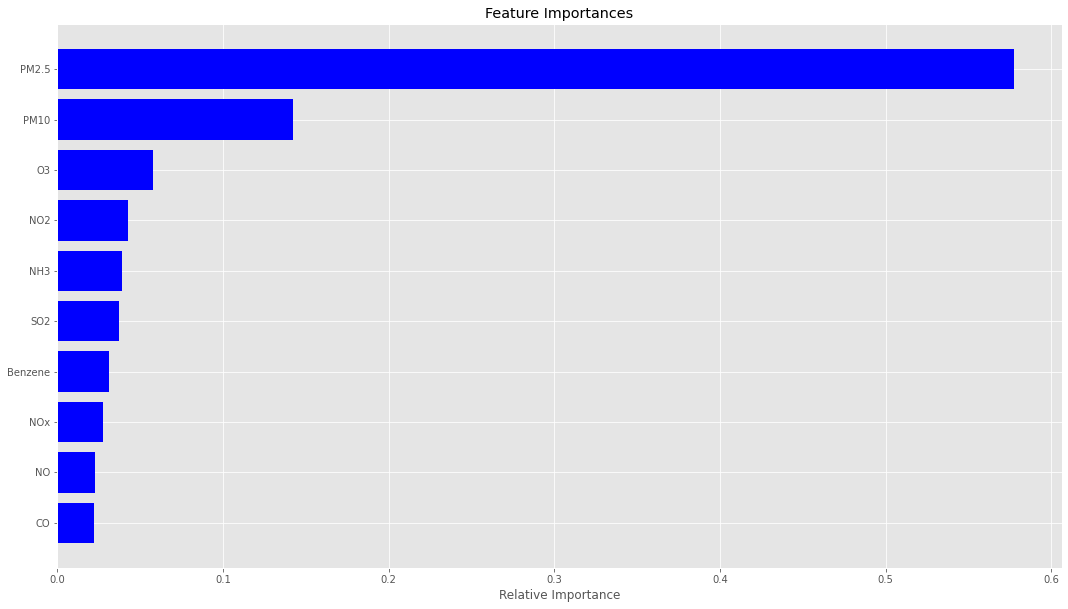

In [ ]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### **Extra Tress Regressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [ ]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=200, n_jobs=None, oob_score=False,
                    random_state=1234, verbose=0, warm_start=False)

In [ ]:
# extratree_score = extra_tree.score(X_train, y_train)
# extratree_score

0.9999999999963521

In [ ]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.8164375552630081

In [ ]:
extratree_pred = extra_tree.predict(X_test)

In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Root mean squared error: 42.33


In [ ]:
extratree_score2 = extra_tree.score(X_train, y_train)
extratree_score2

0.9999999999963521

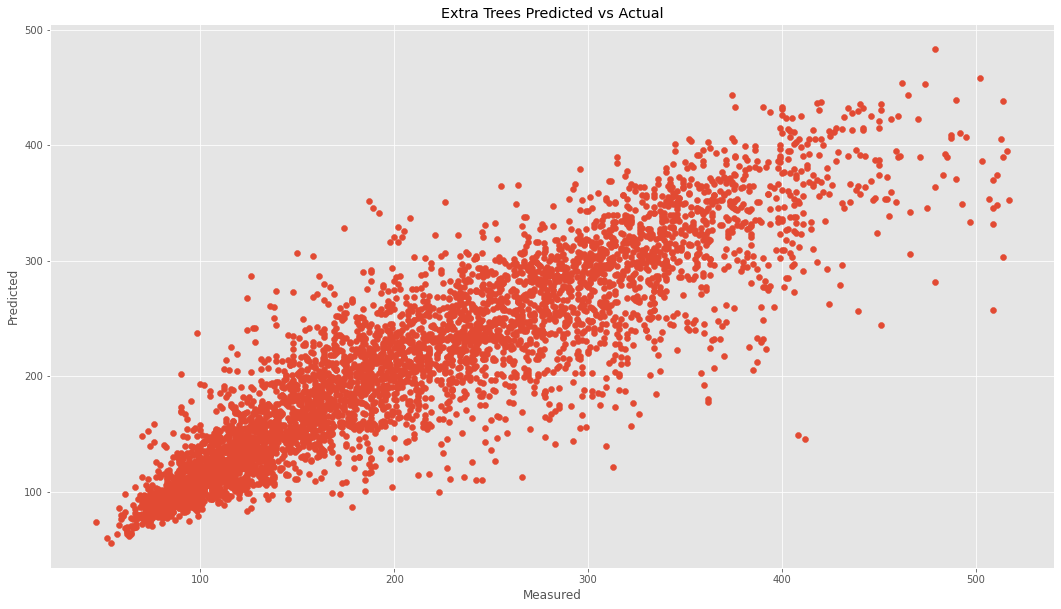

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

In [ ]:
extratree_pred2 = extra_tree.predict(X)

In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y, extratree_pred2)))

Root mean squared error: 23.18


In [ ]:
extratree_pred2

array([168.955, 121.   , 123.   , ..., 101.   , 118.315, 101.   ])

In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_new, extratree_pred3)))

Root mean squared error: 20.00


### **Decision tree + Adaboost**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [ ]:
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [ ]:
tree_1.score(X_test, y_test)

0.5983103329299067

In [ ]:
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.8048788216293385

In [ ]:
# boosted_tree_score2 = tree_2.score(X_train, y_train)
# boosted_tree_score2

0.9999924034221905

In [ ]:
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Root mean squared error: 43.64
Mean absolute error: 27.30
R-squared: 0.80


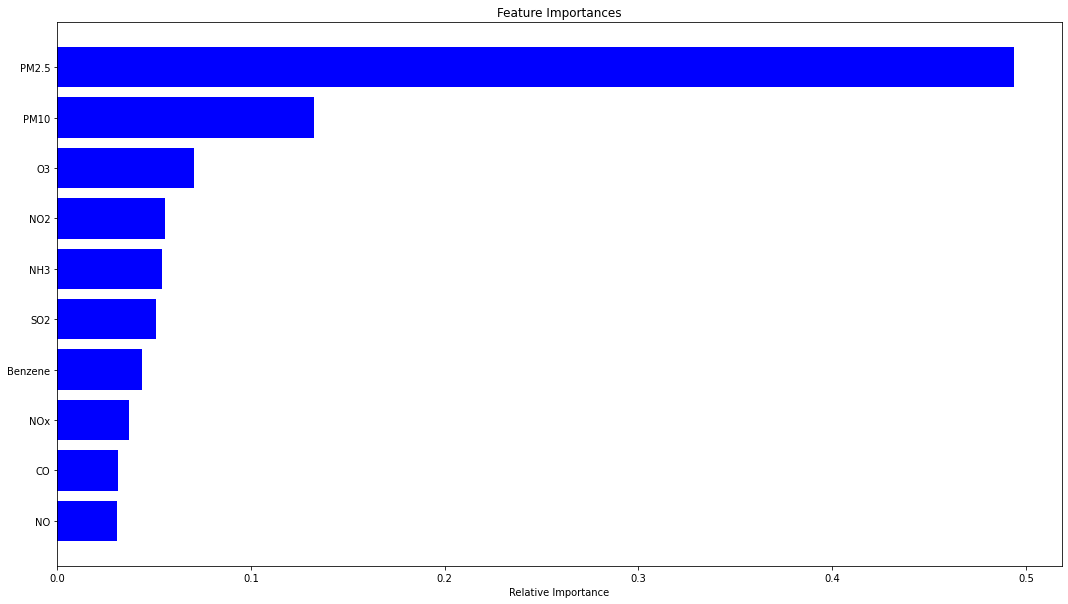

In [ ]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

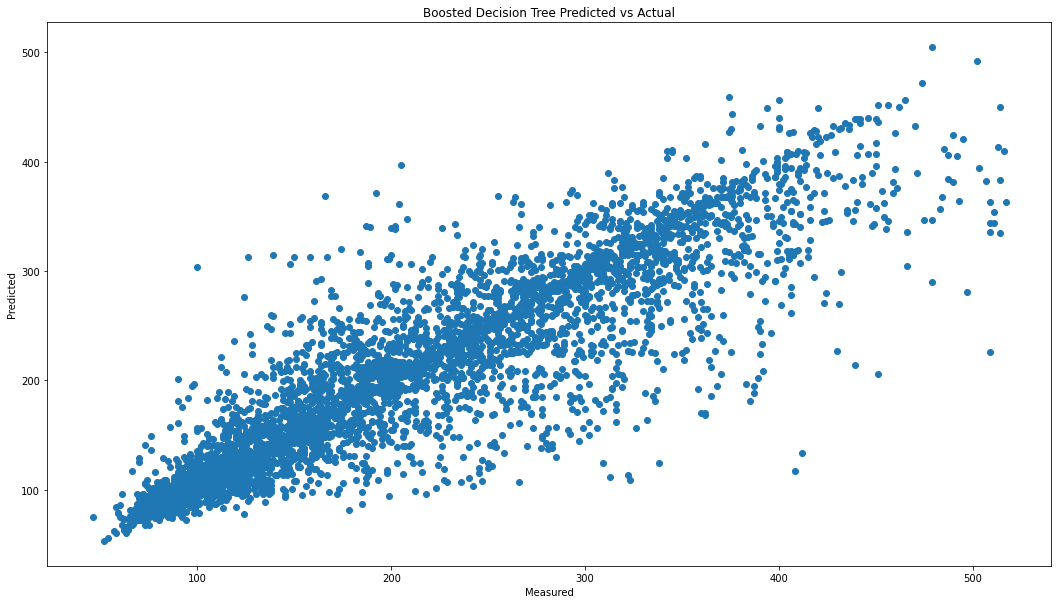

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(y_test, tree_2_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
plt.show()

### **XGBoost**

In [ ]:
from xgboost.sklearn import XGBRegressor

xboost = XGBRegressor(n_estimators=200)

In [ ]:
xboost.fit(X_train, y_train)

[14:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# xgb_score = xboost.score(X_train, y_train)
# xgb_score

0.7912156215669004

In [ ]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.7486335723505587

In [ ]:
xboost_pred = xboost.predict(X_test)

In [ ]:

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 49.53


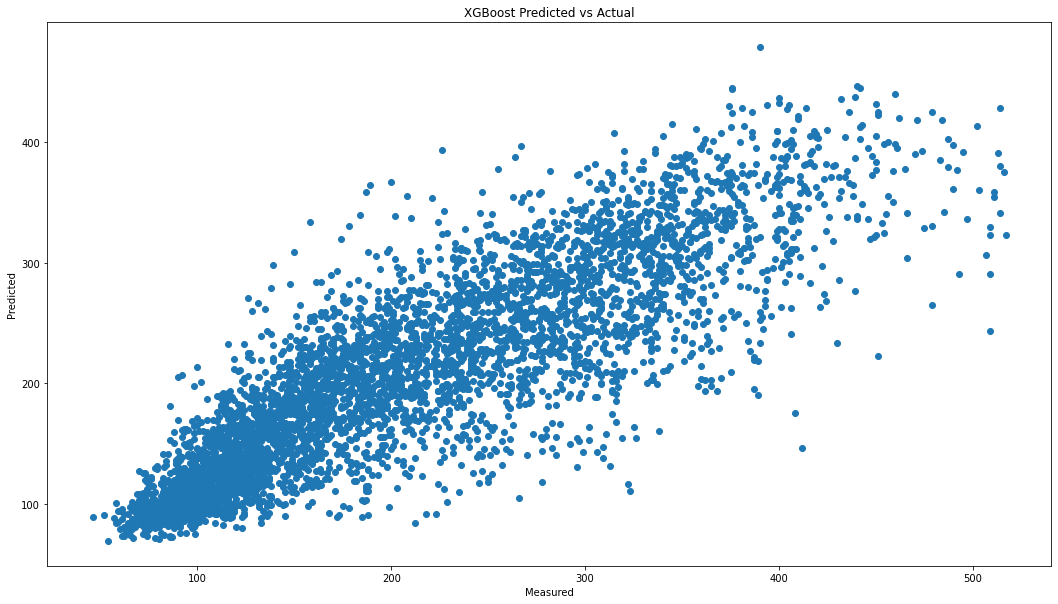

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(y_test, xboost_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

### **Comparing the models**

In [ ]:

print("Scores:")
print("Linear regression score: ", lr_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  0.6789658532734304
Neural network regression score:  0.7443048488743036
Lasso regression score:  0.6750612184825929
ElasticNet regression score:  0.6752479401255527
Decision forest score:  0.7992009843585217
Extra Trees score:  0.8164375552630081
Boosted decision tree score:  0.808590542217227
XGBoost score: 0.7486335723505587


RMSE:
Linear regression RMSE: 55.99
Neural network RMSE: 49.96
Lasso RMSE: 56.31
ElasticNet RMSE: 56.30
Decision forest RMSE: 44.27
Extra Trees RMSE: 42.33
Boosted decision tree RMSE: 43.22
XGBoost RMSE: 49.53
